<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction:-Logistic-regression" data-toc-modified-id="Introduction:-Logistic-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction: Logistic regression</a></span></li><li><span><a href="#Simple-logistic-regression" data-toc-modified-id="Simple-logistic-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simple logistic regression</a></span></li><li><span><a href="#Polynomial-logistic-regression" data-toc-modified-id="Polynomial-logistic-regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Polynomial logistic regression</a></span></li><li><span><a href="#Implementation-using-SKlearn" data-toc-modified-id="Implementation-using-SKlearn-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Implementation using SKlearn</a></span></li><li><span><a href="#Implementation-using-Statsmodel" data-toc-modified-id="Implementation-using-Statsmodel-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Implementation using Statsmodel</a></span><ul class="toc-item"><li><span><a href="#Influence-analysis-performed-by-Statsmodel" data-toc-modified-id="Influence-analysis-performed-by-Statsmodel-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Influence analysis performed by Statsmodel</a></span></li></ul></li></ul></div>

# Introduction: Logistic regression 
This notebook explores a Python implementation of logistic regression in 2D, first with linear terms, and then with multiple polynomial terms. 

These are Python implementations of exercise 2) from Andrew Ng's course: Machine Learning on coursera.

Some similar notebooks and sources: 
[1][1] 
[2][2] 

### Libraries

[1]: http://nbviewer.jupyter.org/github/JWarmenhoven/Machine-Learning/blob/master/notebooks/Programming%20Exercise%202%20-%20Logistic%20Regression.ipynb

[2]: https://github.com/kaleko/CourseraML/blob/a815ac95ba3d863b7531926b1edcdb4f5dd0eb6b/ex2/ex2.ipynb

In [42]:
import os
import math as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.optimize as opt
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import statsmodels.api as sm
%matplotlib inline
sns.set(style='white')

### Import data set and visualize the data 

,Exam1,Exam2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


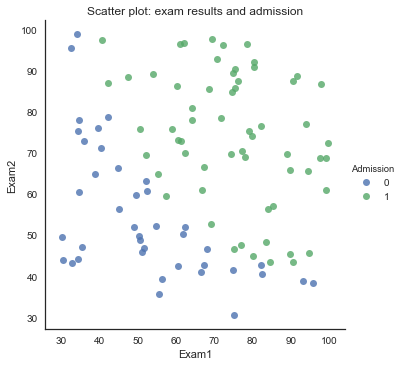

In [3]:
data1 = pd.read_csv("/Users/User/Desktop/Computer_Science/stanford_ml/machine-learning-ex2/ex2/ex2data1.txt", header = None, names = ["Exam1", "Exam2", "Admission"])
display(data1.head())
sns.lmplot("Exam1", "Exam2", data = data1, hue = "Admission",fit_reg = False)
plt.title("Scatter plot: exam results and admission")
plt.show()

# Simple logistic regression 
Only linear terms in the function $h_\theta(x) = \theta^Tx$

### Initialize the training data: design matrix X, output vector y, theta vector

In [4]:
X = data1.iloc[:,0:2].values
m,n = X.shape
X = np.concatenate((np.ones(m)[:,np.newaxis],X),1)
y = data1.iloc[:,-1].values[:,np.newaxis]
initial_theta = np.zeros((n+1))


### Defining the cost and gradient function 

#### Logistic regression hypothesis
$$ h_{\theta}(x) = g(\theta^{T}x)$$
$$ g(z)=\frac{1}{1+e^{−z}} $$

#### Cost Function
$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$

#### Vectorized Cost Function
$$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

#### Partial derivative

$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 

#### Vectorized
$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$


In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def CostFunc(theta,X,y):
    '''Computes the cost of using theta as the
    parameter for logistic regression'''

    #Initializing variables
    m = len(y)
    J = 0
    grad = np.zeros(theta.shape)
    
    #Vectorized computations
    z = X @ theta
    h = sigmoid(z)
    J = (1/m) * ( (-y.T @ np.log(h)) - (1 - y).T @ np.log(1-h));
    
    return J

def Gradient(theta,X,y):
    '''Computes the gradient of the cost w.r.t. to the parameters.'''

    #Initializing variables
    m = len(y)
    theta = theta[:,np.newaxis]
    grad = np.zeros(theta.shape)
    
    #Vectorized computations
    z = X @ theta
    h = sigmoid(z)
    grad = (1/m)*(X.T @ ( h - y));
    
    return grad.ravel()

def Predictions(theta, X):
    #Return predicted values given X and optimal theta. Returned value in form 0, 1
    #Based on assumption that Threshold T = 0.5
    
    res = np.sign(X @ theta[:,np.newaxis])
    np.putmask(res,res == -1,0)
    return res

def Accuracy(y_pred, y):
    diff = y_pred - y
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff)) 
    

### Optimizing the cost function using Scipy 

In [6]:
model = opt.minimize(fun = CostFunc, x0 = initial_theta, args = (X, y), method = 'TNC', jac = Gradient)
theta_pred = model.x
y_pred = Predictions(theta_pred,X)
Accuracy(y_pred,y)

0.89

### Predicted probability of admission for a student with 45, 85 exam grades 

In [7]:
sigmoid(model.x @ np.array([1,45,85]))

0.7762906239950911

### Visualizing the decision boundary 

$$ g(\theta_0 + \theta_1x_1+...+\theta_n x_n) = T$$

- Positive decision when $g(\theta^Tx) \geq T$
- Negative decision when $g(\theta^Tx) < T$


In our case, $g(\theta^Tx)$ is the sigmoid function whose inverse is the log odds function, so the decision boundary can be re-written as:

$$ \theta_0 + \theta_1x_1+...+\theta_n x_n = \log \left( \frac{T}{1 - T} \right)$$ 

For the simple 2-D case and a threshold value of 0.5 this gives: 


\begin{aligned}
 	\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0
	\\
	x_2 = - \frac{(\theta_0 + \theta_1 x_1)}{\theta_2}
\end{aligned}



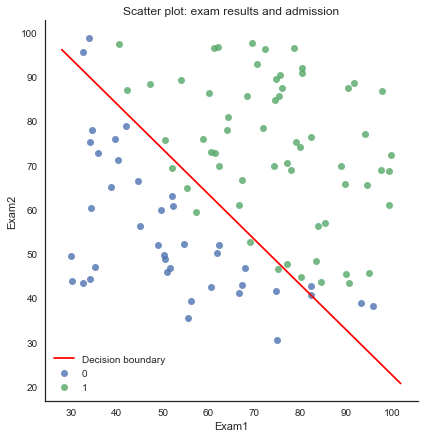

In [8]:
#Straight line decision boundary
plot_x_1 = np.array([min(data1.Exam1) - 2, max(data1.Exam1) + 2 ])
plot_x_2 = - (theta_pred[0] + theta_pred[1] * plot_x_1) / theta_pred[2]

#Plotting on sns
sns.lmplot("Exam1", "Exam2", data = data1, hue = "Admission",fit_reg = False, legend = False, size = 6)
plt.plot(plot_x_1, plot_x_2, color = 'r', label = 'Decision boundary')
plt.title("Scatter plot: exam results and admission")
plt.legend(loc = 0)
plt.show()

# Polynomial logistic regression 

,test1,test2,output
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


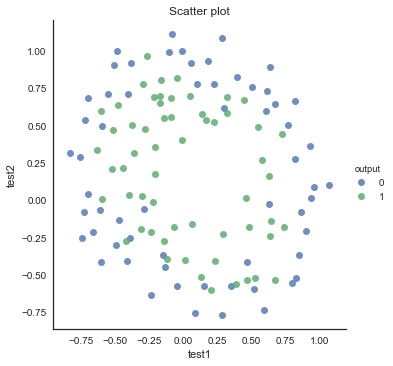

In [9]:
data2 = pd.read_csv("/Users/User/Desktop/Computer_Science/stanford_ml/machine-learning-ex2/ex2/ex2data2.txt", header = None, names = ["test1", "test2", "output"])
display(data2.head())
pos = data2[data2.output == 1]
neg = data2[data2.output == 0]

sns.lmplot("test1", "test2", data = data2, hue = "output",fit_reg = False)
plt.title("Scatter plot")
plt.show()

### Adding non linear features to the design matrix

$X := x_1 + x_2 + x_1^2 + x_2^2 + x_1 x_2 + x_1^2 x_2^2 + ... $


In [10]:
def mapFeature(X1, X2):
    '''MAPFEATURE Feature mapping function to polynomial features
    MAPFEATURE(X1, X2) maps the two input features
    to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of 
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Inputs X1, X2 must be the same size'''
    X1 = X1[:,np.newaxis]
    X2 = X2[:,np.newaxis]
    degree = 6
    m,n = X1.shape
    out = np.ones(m)[:,np.newaxis]
    for i in range(1,degree+1):
        for j in range(0,i+1):
            tmp = (X1**(i-j))* (X2**j);
            out = np.concatenate((out,tmp),1) 
        
    return out

### Initialize the training data: design matrix X, output vector y, theta vector

In [11]:
#Load values
X = data2.iloc[:,0:2].values
m,n = X.shape
X = np.concatenate((np.ones(m)[:,np.newaxis],X),1)
y = data2.iloc[:,-1][:,np.newaxis]

#Generate polynomial design matrix
X = mapFeature(data2.test1, data2.test2)
m,n = X.shape
initial_theta = np.ones(n)
lamda = 10

### Alternative polynomial method using Sklearn 

In [12]:
# Note that this function inserts a column with 'ones' in the design matrix for the intercept.
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2.iloc[:,0:2].values)
display(XX.shape)
display(XX[0:5,1])
display(X[0:5,1])

(118, 28)

array([ 0.051267, -0.092742, -0.21371 , -0.375   , -0.51325 ])

array([ 0.051267, -0.092742, -0.21371 , -0.375   , -0.51325 ])

### Defining the cost and gradient functions for regularized regression

#### Regularized Cost Function
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$
#### Vectorized Cost Function
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

#### Partial derivative

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$$ 
#### Vectorized
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) + \frac{\lambda}{m}\theta_{j}$$
##### $$\text{Note: intercept parameter } \theta_{0} \text{ is not to be regularized}$$

In [13]:
def costFunctionReg(theta,X,y,lamda):
    '''Compute cost for logistic regression with regularization  '''
    
    #Initializations
    theta = theta[:,np.newaxis]
    m = len(y)
    n,_ = theta.shape 
    J = 0
    L = np.eye(n)
    L[0,0] = 0
    
    #Computations
    z = X @ theta
    h = sigmoid(z)
    J_reg = (lamda / (2*m)) * ((L@theta).T @ theta)
    J = (1/m) * ( (-y.T @ np.log(h)) - (1 - y).T @ np.log(1-h)) + J_reg;
    
    return J

def GradientReg(theta,X,y,lamda):
    '''Compute gradient for logistic regression with regularization  '''
    
    #Initializations
    theta = theta[:,np.newaxis]
    m = len(y)
    n,_ = theta.shape 
    grad = np.zeros(theta.shape)
    L = np.eye(n)
    L[0,0] = 0
    
    #Computations
    z = X @ theta
    h = sigmoid(z)
    
    grad_reg = (lamda/m) * (L@theta)
    grad = (1/m)*(X.T @ ( h - y)) + grad_reg
    
    return grad.ravel()


### Running the optimization using Scipy optimize

In [14]:
model2 = opt.minimize(fun = costFunctionReg, x0 = initial_theta, args = (X, y, 1), method = 'BFGS', jac = GradientReg)
display(model2.x[0:5])
res2 = model2.x

array([ 1.27286581,  0.62524684,  1.18120451, -2.02018537, -0.91710959])

### Predicting values and accuracy 

In [15]:
y_pred = Predictions(model2.x,X)
Accuracy(y_pred,y)

0.8305084745762712

### Plotting the polynomial decision boundary for different lambda values

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


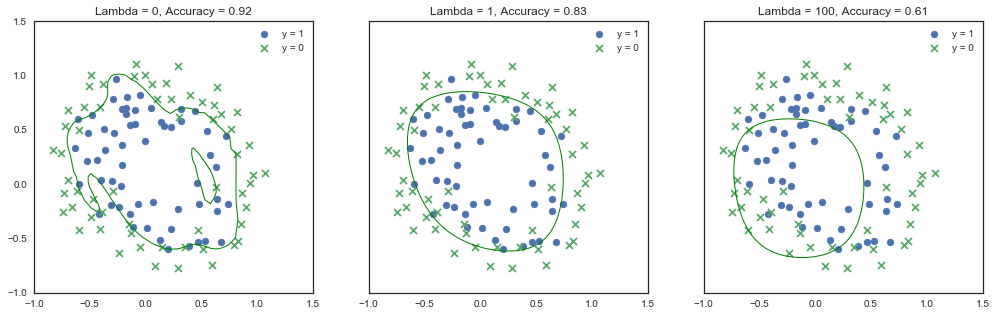

In [16]:
#Initializing meshgrid and figure
u = np.linspace(-1,1.5,50)
v = np.linspace(-1,1.5,50)
xx1, xx2 = np.meshgrid(u, v)
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))


#Initializing lambda values
lamda = [0,1,100]

#Looping through lambda values, performing logistic regression and plotting result on each axes
for l in range(3):
    res = opt.minimize(fun = costFunctionReg, x0 = initial_theta, args = (X, y, lamda[l]), method = 'BFGS', jac = GradientReg)
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res.x))
    h = h.reshape(xx1.shape)
    
    axes[l].scatter(pos.test1,pos.test2, marker = 'o', label = 'y = 1')
    axes[l].scatter(neg.test1,neg.test2, marker = 'x', label = 'y = 0')
    axes[l].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
    axes[l].set_title('Lambda = {}, Accuracy = {}'.format(lamda[l], round(Accuracy(Predictions(res.x,X),y),2)))
    axes[l].legend()

plt.show()

# Implementation using SKlearn 
Note that in SKlearn, the regularization parameter C works as 1 / lambda hence is the inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization

In [17]:
model_SK = linear_model.LogisticRegression(fit_intercept=False,C=1, penalty='l2', solver='liblinear')
model_SK.fit(X,y.ravel())
model_SK.coef_

array([[ 1.1421418 ,  0.60133123,  1.16720816, -1.87175318, -0.91573602,
        -1.26954353,  0.12666993, -0.36872263, -0.34519427, -0.1737859 ,
        -1.42387402, -0.04858047, -0.60640851, -0.26932551, -1.16317987,
        -0.24308611, -0.20707255, -0.0432088 , -0.28027502, -0.28694562,
        -0.46911911, -1.03616566,  0.02922704, -0.29262593,  0.01734536,
        -0.32896299, -0.13795013, -0.93199552]])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


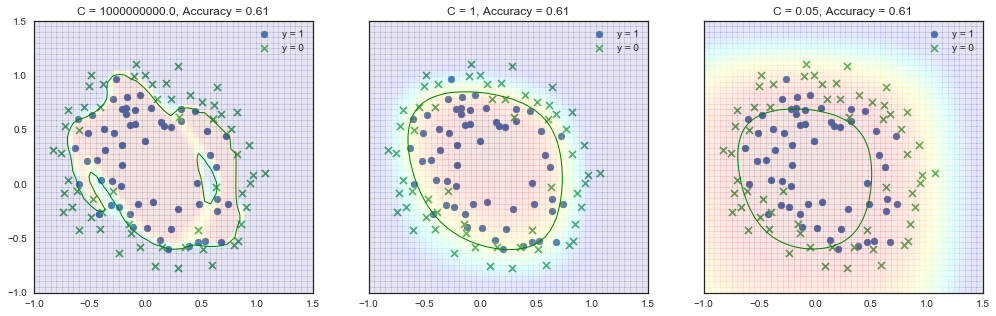

In [31]:
#Initializing meshgrid and figure
u = np.linspace(-1,1.5,50)
v = np.linspace(-1,1.5,50)
xx1, xx2 = np.meshgrid(u, v)
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))


#Initializing lambda values
C = [1e9,1,0.05]

#Looping through lambda values, performing logistic regression and plotting result on each axes
for l in range(3):
    model_SK = linear_model.LogisticRegression(fit_intercept=False,C=C[l], penalty='l2', solver='liblinear')
    model_SK.fit(X,y.ravel())
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(model_SK.coef_.T))
    h = h.reshape(xx1.shape)
    
    axes[l].scatter(pos.test1,pos.test2, marker = 'o', label = 'y = 1')
    axes[l].scatter(neg.test1,neg.test2, marker = 'x', label = 'y = 0')
    axes[l].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
    axes[l].pcolormesh(xx1, xx2, h, alpha = .1, cmap = 'jet', edgecolors = 'none')
    axes[l].grid(False)
    axes[l].set_title('C = {}, Accuracy = {}'.format(C[l], round(Accuracy(Predictions(res.x,X),y),2)))
    axes[l].legend()

plt.show()

# Implementation using Statsmodel 

Attention: workaround needed to print the summary method in statsmodel due to this [issue][1]

[1]: https://github.com/statsmodels/statsmodels/issues/3931

In [51]:
model_sm = sm.Logit(y,X)
results = model_sm.fit()

#Implementing workaround due to error in statsmodel 
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.219290
         Iterations 26
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  118
Model:                          Logit   Df Residuals:                       90
Method:                           MLE   Df Model:                           27
Date:                Mon, 04 Jun 2018   Pseudo R-squ.:                  0.6836
Time:                        20:04:13   Log-Likelihood:                -25.876
converged:                       True   LL-Null:                       -81.774
                                        LLR p-value:                 2.756e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.2308     16.055      2.381      0.017       6.763      69.698
x1            55.5958     24

### These coefficients correspond to those calculated by SKlearn with very large C parameter 
i.e. very little regularization

In [54]:
model_SK = linear_model.LogisticRegression(fit_intercept=False,C=1e11, penalty='l2', solver='liblinear')
model_SK.fit(X,y.ravel())
model_SK.coef_

array([[   38.0034823 ,    55.26052725,    97.42397577,  -367.23700386,
         -176.12715784,  -193.17142625,  -363.77621537,  -836.13559886,
         -714.53542402,  -508.25491234,  1175.90316993,  1271.79832816,
         1896.68962561,   908.9281046 ,   511.29819979,   569.74464729,
         1618.31227424,  2536.40351509,  2899.08507339,  1768.86178141,
          780.08985698, -1250.96372367, -2246.03212402, -4116.21312226,
        -4263.30297736, -4204.34819201, -2043.23441126,  -745.87171756]])

In [57]:
((176.75 - 175.95)**2 + (168.25- 175.95)**2 + (182.875- 175.95)**2)*8

863.0849999999999